In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv',delimiter = '~' )
test_data= pd.read_csv('test.csv',delimiter = '~' )

In [2]:
df= pd.read_csv('train.csv',delimiter = '~' )

In [3]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good


In [23]:
test_data.head()

,User_ID,Description,Browser_Used,Device_Used
0,9602,A friend and I stayed in this hotel when we we...,Edge,Desktop
1,8749,I enjoy staying here when I have early flights...,Google Chrome,Mobile
2,15500,I stopped off in Seattle during a train tour o...,Chrome,Mobile
3,5495,I have stayed at this hotel - or - times now f...,Mozilla Firefox,Desktop
4,18570,Excellent location with hop on hop off city tr...,Edge,Mobile


In [24]:
df.Is_Response.value_counts()

Good    20567
Bad      9605
Name: Is_Response, dtype: int64

In [25]:
df_train=df[['Description','Is_Response']]

In [26]:
df_test=test_data[['Description']]

In [27]:
df_test.head()

,Description
0,A friend and I stayed in this hotel when we we...
1,I enjoy staying here when I have early flights...
2,I stopped off in Seattle during a train tour o...
3,I have stayed at this hotel - or - times now f...
4,Excellent location with hop on hop off city tr...


In [28]:
import re
#write a function to clean text data
def text_clean(data):
    data['Description'] =data['Description'].apply(lambda x: x.lower())
    data['Description']= data['Description'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    return data

    

In [29]:
df_train=text_clean(df_train)

C:\Users\satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
df_test=text_clean(df_test)

C:\Users\satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
from sklearn.preprocessing import LabelEncoder


In [49]:
number=LabelEncoder()

In [50]:
df_train['Is_Response']=number.fit_transform(df_train['Is_Response'].astype('str'))

C:\Users\satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_train.head()

,Description,Is_Response
0,after reading mixed reviews i almost didnt boo...,1
1,this motor inn is located about city blocks f...,1
2,it was our first time there and surely not our...,1
3,great hotel in an excellent location just off ...,1
4,we stayed at the hotel for weeks to get away ...,1


In [54]:
import numpy as np
length = [len(s.split()) for s in df_train['Description']]
print(np.median(length))
print(np.mean(length))
print(np.max(length))
print(np.min(length))

121.0
154.86586901763224
2275
4


In [88]:
# create vocabulary and text to sequences for word embedding  , also need to find the max length  of  vector
from tensorflow.keras.preprocessing.text import Tokenizer
#Tokenize
max_features=5000
tokenizer=Tokenizer(num_words=max_features,  split=' ')
tokenizer.fit_on_texts(df_train['Description'].values)
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'was': 5, 'i': 6, 'in': 7, 'we': 8, 'of': 9, 'is': 10, 'for': 11, 'hotel': 12, 'it': 13, 'room': 14, 'at': 15, 'were': 16, 'but': 17, 'that': 18, 'this': 19, 'on': 20, 'with': 21, 'very': 22, 'you': 23, 'not': 24, 'had': 25, 'my': 26, 'there': 27, 'our': 28, 'are': 29, 'have': 30, 'they': 31, 'from': 32, 'as': 33, 'stay': 34, 'great': 35, 'staff': 36, 'so': 37, 'be': 38, 'all': 39, 'would': 40, 'rooms': 41, 'if': 42, 'good': 43, 'one': 44, 'location': 45, 'nice': 46, 'stayed': 47, 'when': 48, 'out': 49, 'no': 50, 'us': 51, 'an': 52, 'which': 53, 'clean': 54, 'night': 55, 'just': 56, 'service': 57, 'or': 58, 'only': 59, 'breakfast': 60, 'up': 61, 'get': 62, 'here': 63, 'about': 64, 'time': 65, 'me': 66, 'also': 67, 'its': 68, 'by': 69, 'desk': 70, 'like': 71, 'bed': 72, 'friendly': 73, 'again': 74, 'could': 75, 'did': 76, 'area': 77, 'day': 78, 'well': 79, 'place': 80, 'other': 81, 'comfortable': 82, 'front': 83, 'small': 84, 'some': 85, 'really': 8

In [89]:
#print(sort(tokenizer.word_counts), ascending = False)

print(sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True))

[('the', 311013), ('and', 165371), ('a', 135940), ('to', 121955), ('was', 104234), ('i', 81155), ('in', 76540), ('we', 66524), ('of', 64989), ('is', 58793), ('for', 57750), ('hotel', 54946), ('it', 48961), ('room', 47513), ('at', 38418), ('were', 36623), ('but', 35912), ('that', 35260), ('this', 35133), ('on', 35068), ('with', 34805), ('very', 32807), ('you', 30715), ('not', 30038), ('had', 28609), ('my', 26069), ('there', 25552), ('our', 25331), ('are', 23307), ('have', 23261), ('they', 21344), ('from', 21067), ('as', 20747), ('stay', 20499), ('great', 19688), ('staff', 18863), ('so', 18509), ('be', 17773), ('all', 17107), ('would', 17031), ('rooms', 15710), ('if', 15418), ('good', 14672), ('one', 14424), ('location', 14278), ('nice', 14250), ('stayed', 12969), ('when', 12821), ('out', 12742), ('no', 12706), ('us', 12448), ('an', 12432), ('which', 12269), ('clean', 12265), ('night', 12042), ('just', 11624), ('service', 11375), ('or', 11126), ('only', 10847), ('breakfast', 10755), ('up

In [90]:
x = tokenizer.texts_to_sequences(df_train['Description'].values)
x[0]

[98,
 763,
 1633,
 257,
 6,
 477,
 94,
 481,
 15,
 1,
 577,
 17,
 6,
 5,
 1267,
 3,
 2168,
 15,
 1,
 1318,
 2,
 23,
 287,
 62,
 130,
 89,
 289,
 101,
 1,
 577,
 11,
 423,
 728,
 4236,
 1920,
 68,
 876,
 20,
 292,
 9,
 1,
 859,
 2,
 353,
 203,
 1,
 891,
 422,
 32,
 488,
 353,
 1112,
 525,
 19,
 10,
 3,
 112,
 2,
 22,
 1437,
 12,
 17,
 170,
 36,
 609,
 6,
 855,
 5,
 73,
 2,
 1050,
 4,
 57,
 32,
 1,
 309,
 109,
 4,
 1,
 83,
 70,
 4,
 14,
 57,
 4,
 1,
 2032,
 7,
 1276,
 704,
 1389,
 270,
 11,
 1,
 447,
 2033,
 427,
 5,
 35,
 136,
 6,
 179,
 4684,
 14,
 57,
 26,
 113,
 65,
 15,
 130,
 288,
 136,
 215,
 1251,
 101,
 1599,
 2,
 6,
 5,
 611,
 1,
 2853,
 5,
 878,
 1,
 149,
 300,
 277,
 25,
 3,
 1121,
 2190,
 3662,
 5,
 35,
 3,
 985,
 7,
 3,
 441,
 21,
 1,
 962,
 2,
 2,
 1,
 1460,
 3122,
 300,
 162,
 102,
 611,
 69,
 3122,
 163,
 17,
 393,
 6,
 133,
 14,
 1269,
 79,
 726,
 2,
 82,
 1,
 1759,
 1649,
 436,
 58,
 81,
 3900,
 5,
 1166,
 42,
 392,
 1534,
 64,
 665,
 187,
 32,
 1,
 2476,
 527,
 3,
 15

In [91]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#to make the matrix fixed length
x = pad_sequences(x, maxlen = 100)

x.shape

(30172, 100)

In [92]:
embed_dim = 128  #Integer number of dimensions for embedding matrix
lstm_out = 64

In [93]:
#split test train  data from train data
y=df_train['Is_Response']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=.33)

In [94]:
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Embedding,Dense

In [72]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))
model.add(LSTM(256,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='softmax'))

In [73]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           384000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 778,754
Trainable params: 778,754
Non-trainable params: 0
_________________________________________________________________


In [96]:
ytrain = np.asarray(ytrain)
ytest = np.asarray(ytest)
xtrain=np.asarray(xtrain)
xtest=np.asarray(xtest)

In [76]:
history=model.fit(xtrain,ytrain,epochs=12,batch_size=32,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/12
20215/20215 [==============================] - 426s 21ms/sample - loss: 0.4564 - accuracy: 0.7853 - val_loss: 0.4067 - val_accuracy: 0.8171
Epoch 2/12
20215/20215 [==============================] - 439s 22ms/sample - loss: 0.3600 - accuracy: 0.8434 - val_loss: 0.3781 - val_accuracy: 0.8358
Epoch 3/12
20215/20215 [==============================] - 451s 22ms/sample - loss: 0.3124 - accuracy: 0.8672 - val_loss: 0.3861 - val_accuracy: 0.8279
Epoch 4/12
20215/20215 [==============================] - 458s 23ms/sample - loss: 0.2706 - accuracy: 0.8889 - val_loss: 0.4216 - val_accuracy: 0.8309
Epoch 5/12
20215/20215 [==============================] - 467s 23ms/sample - loss: 0.2301 - accuracy: 0.9085 - val_loss: 0.4792 - val_accuracy: 0.8277
Epoch 6/12
20215/20215 [==============================] - 476s 24ms/sample - loss: 0.1963 - accuracy: 0.9233 - val_loss: 0.4855 - val_accuracy: 0.8159
Epoch 7/12
20215/20215 [=====================

In [77]:
def plot_learningCurve(history, epochs):
    

    # Plot training & validation accuracy
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values\n",
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

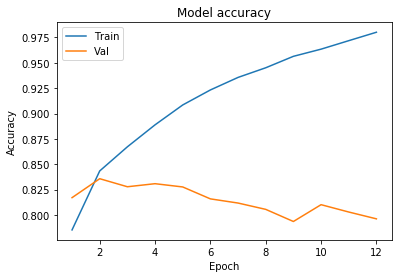

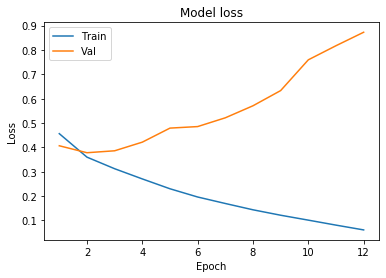

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 12)

In [81]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))
model.add(LSTM(256,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=3,batch_size=64,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/3
20215/20215 [==============================] - 328s 16ms/sample - loss: 0.4591 - accuracy: 0.7841 - val_loss: 0.4024 - val_accuracy: 0.8173
Epoch 2/3
20215/20215 [==============================] - 384s 19ms/sample - loss: 0.3653 - accuracy: 0.8430 - val_loss: 0.3861 - val_accuracy: 0.8331
Epoch 3/3
20215/20215 [==============================] - 390s 19ms/sample - loss: 0.3260 - accuracy: 0.8627 - val_loss: 0.4066 - val_accuracy: 0.8221


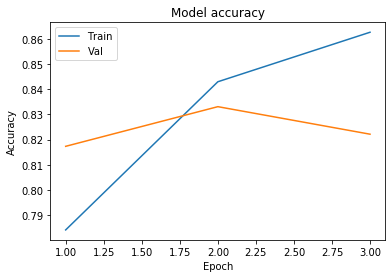

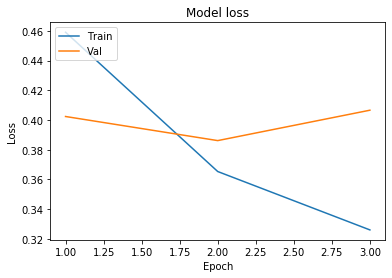

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 3)

In [83]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))
model.add(LSTM(128,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=3,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/3
20215/20215 [==============================] - 114s 6ms/sample - loss: 0.4740 - accuracy: 0.7747 - val_loss: 0.3827 - val_accuracy: 0.8334
Epoch 2/3
20215/20215 [==============================] - 125s 6ms/sample - loss: 0.3622 - accuracy: 0.8414 - val_loss: 0.3796 - val_accuracy: 0.8298
Epoch 3/3
20215/20215 [==============================] - 124s 6ms/sample - loss: 0.3196 - accuracy: 0.8624 - val_loss: 0.3824 - val_accuracy: 0.8277


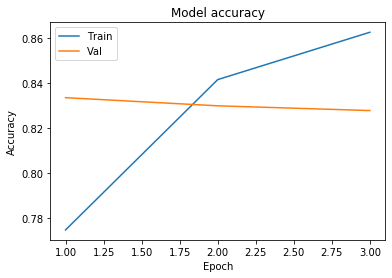

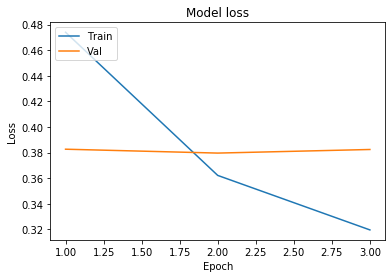

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 3)

In [85]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))
model.add(LSTM(64,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=3,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/3
20215/20215 [==============================] - 65s 3ms/sample - loss: 0.4690 - accuracy: 0.7750 - val_loss: 0.3866 - val_accuracy: 0.8312
Epoch 2/3
20215/20215 [==============================] - 64s 3ms/sample - loss: 0.3587 - accuracy: 0.8426 - val_loss: 0.3856 - val_accuracy: 0.8303
Epoch 3/3
20215/20215 [==============================] - 62s 3ms/sample - loss: 0.3285 - accuracy: 0.8600 - val_loss: 0.3911 - val_accuracy: 0.8267


In [98]:
#changing max features to 5000,earlier 300,max length to 100 from 50
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))
model.add(LSTM(128,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/5
20215/20215 [==============================] - 232s 11ms/sample - loss: 0.4439 - accuracy: 0.7913 - val_loss: 0.3530 - val_accuracy: 0.8512
Epoch 2/5
20215/20215 [==============================] - 251s 12ms/sample - loss: 0.3066 - accuracy: 0.8760 - val_loss: 0.3364 - val_accuracy: 0.8598
Epoch 3/5
20215/20215 [==============================] - 256s 13ms/sample - loss: 0.2584 - accuracy: 0.8952 - val_loss: 0.3926 - val_accuracy: 0.8534
Epoch 4/5
20215/20215 [==============================] - 260s 13ms/sample - loss: 0.2155 - accuracy: 0.9158 - val_loss: 0.3776 - val_accuracy: 0.8420
Epoch 5/5
20215/20215 [==============================] - 262s 13ms/sample - loss: 0.1861 - accuracy: 0.9297 - val_loss: 0.4313 - val_accuracy: 0.8387


In [100]:
import pandas as   pd
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D,MaxPooling1D,GlobalMaxPooling1D,Dropout,Embedding,Activation,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [103]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))#model.add(Flatten())
model.add(Conv1D(32,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
#model.add(Dense(128,activation='relu'))
#model.add(Dropout(.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/5
20215/20215 [==============================] - 39s 2ms/sample - loss: 0.5503 - accuracy: 0.7162 - val_loss: 0.4317 - val_accuracy: 0.8260
Epoch 2/5
20215/20215 [==============================] - 38s 2ms/sample - loss: 0.3449 - accuracy: 0.8496 - val_loss: 0.3954 - val_accuracy: 0.8433
Epoch 3/5
20215/20215 [==============================] - 38s 2ms/sample - loss: 0.2643 - accuracy: 0.8908 - val_loss: 0.3847 - val_accuracy: 0.8364
Epoch 4/5
20215/20215 [==============================] - 38s 2ms/sample - loss: 0.1961 - accuracy: 0.9248 - val_loss: 0.3741 - val_accuracy: 0.8379
Epoch 5/5
20215/20215 [==============================] - 40s 2ms/sample - loss: 0.1154 - accuracy: 0.9587 - val_loss: 0.4554 - val_accuracy: 0.8217


In [104]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))#model.add(Flatten())
#model.add(Conv1D(32,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.2))
#model.add(Dense(64,activation='relu'))
#model.add(Dropout(.5))
#model.add(Dense(128,activation='relu'))
#model.add(Dropout(.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/5
20215/20215 [==============================] - 24s 1ms/sample - loss: 0.5530 - accuracy: 0.7171 - val_loss: 0.4327 - val_accuracy: 0.8039
Epoch 2/5
20215/20215 [==============================] - 26s 1ms/sample - loss: 0.3584 - accuracy: 0.8430 - val_loss: 0.3692 - val_accuracy: 0.8418
Epoch 3/5
20215/20215 [==============================] - 27s 1ms/sample - loss: 0.2661 - accuracy: 0.8917 - val_loss: 0.3632 - val_accuracy: 0.8404
Epoch 4/5
20215/20215 [==============================] - 32s 2ms/sample - loss: 0.1928 - accuracy: 0.9276 - val_loss: 0.3822 - val_accuracy: 0.8385
Epoch 5/5
20215/20215 [==============================] - 34s 2ms/sample - loss: 0.1234 - accuracy: 0.9560 - val_loss: 0.4396 - val_accuracy: 0.8362


In [105]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))#model.add(Flatten())
#model.add(Conv1D(32,3,activation='relu'))
#model.add(MaxPooling1D(3))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))
#model.add(Dense(32,activation='relu'))
#model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
#model.add(Dense(128,activation='relu'))
#model.add(Dropout(.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/5
20215/20215 [==============================] - 51s 3ms/sample - loss: 0.5237 - accuracy: 0.7338 - val_loss: 0.4338 - val_accuracy: 0.8282
Epoch 2/5
20215/20215 [==============================] - 57s 3ms/sample - loss: 0.3358 - accuracy: 0.8546 - val_loss: 0.3942 - val_accuracy: 0.8450
Epoch 3/5
20215/20215 [==============================] - 55s 3ms/sample - loss: 0.2736 - accuracy: 0.8886 - val_loss: 0.3741 - val_accuracy: 0.8434
Epoch 4/5
20215/20215 [==============================] - 60s 3ms/sample - loss: 0.2262 - accuracy: 0.9091 - val_loss: 0.3727 - val_accuracy: 0.8429
Epoch 5/5
20215/20215 [==============================] - 57s 3ms/sample - loss: 0.1823 - accuracy: 0.9298 - val_loss: 0.3734 - val_accuracy: 0.8371


In [106]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))#model.add(Flatten())
#model.add(Conv1D(32,3,activation='relu'))
#model.add(MaxPooling1D(3))
model.add(Conv1D(128,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))
#model.add(Dense(32,activation='relu'))
#model.add(Dropout(.2))
#model.add(Dense(64,activation='relu'))
#model.add(Dropout(.5))
#model.add(Dense(128,activation='relu'))
#model.add(Dropout(.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/5
20215/20215 [==============================] - 68s 3ms/sample - loss: 0.4838 - accuracy: 0.7577 - val_loss: 0.3661 - val_accuracy: 0.8444
Epoch 2/5
20215/20215 [==============================] - 72s 4ms/sample - loss: 0.3137 - accuracy: 0.8630 - val_loss: 0.3326 - val_accuracy: 0.8610
Epoch 3/5
20215/20215 [==============================] - 78s 4ms/sample - loss: 0.2454 - accuracy: 0.9014 - val_loss: 0.3285 - val_accuracy: 0.8562
Epoch 4/5
20215/20215 [==============================] - 83s 4ms/sample - loss: 0.1887 - accuracy: 0.9282 - val_loss: 0.3438 - val_accuracy: 0.8533
Epoch 5/5
20215/20215 [==============================] - 76s 4ms/sample - loss: 0.1403 - accuracy: 0.9519 - val_loss: 0.3632 - val_accuracy: 0.8499


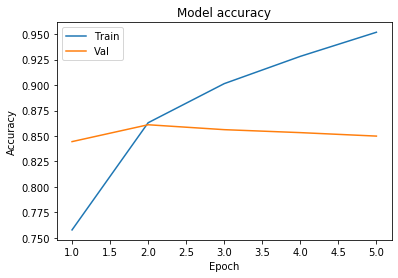

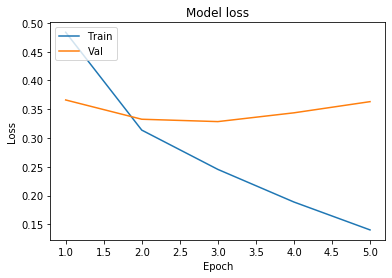

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 5)

In [108]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))#model.add(Flatten())
#model.add(Conv1D(32,3,activation='relu'))
#model.add(MaxPooling1D(3))
model.add(Conv1D(128,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.2))
#model.add(Dense(32,activation='relu'))
#model.add(Dropout(.2))
#model.add(Dense(64,activation='relu'))
#model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=128,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/5
20215/20215 [==============================] - 86s 4ms/sample - loss: 0.4809 - accuracy: 0.7673 - val_loss: 0.4176 - val_accuracy: 0.8345
Epoch 2/5
20215/20215 [==============================] - 93s 5ms/sample - loss: 0.3143 - accuracy: 0.8641 - val_loss: 0.3742 - val_accuracy: 0.8455
Epoch 3/5
20215/20215 [==============================] - 91s 5ms/sample - loss: 0.2517 - accuracy: 0.8976 - val_loss: 0.3719 - val_accuracy: 0.8421
Epoch 4/5
20215/20215 [==============================] - 92s 5ms/sample - loss: 0.1991 - accuracy: 0.9235 - val_loss: 0.3895 - val_accuracy: 0.8294
Epoch 5/5
20215/20215 [==============================] - 109s 5ms/sample - loss: 0.1475 - accuracy: 0.9458 - val_loss: 0.4049 - val_accuracy: 0.8242


In [109]:
model=Sequential()
model.add(Embedding(max_features,embed_dim,input_length=xtrain.shape[1]))
model.add(LSTM(256,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=3,batch_size=64,validation_data=(xtest,ytest))

Train on 20215 samples, validate on 9957 samples
Epoch 1/3
20215/20215 [==============================] - 852s 42ms/sample - loss: 0.4383 - accuracy: 0.7988 - val_loss: 0.3725 - val_accuracy: 0.8531
Epoch 2/3
20215/20215 [==============================] - 878s 43ms/sample - loss: 0.3135 - accuracy: 0.8737 - val_loss: 0.3660 - val_accuracy: 0.8524
Epoch 3/3
20215/20215 [==============================] - 830s 41ms/sample - loss: 0.2543 - accuracy: 0.8991 - val_loss: 0.3881 - val_accuracy: 0.8342
